In [24]:
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import pandas_datareader as web
import numpy as np
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential

import matplotlib.pyplot as mtlplt
from matplotlib import rcParams

In [25]:
## membaca data 
data_frame = pd.read_csv('ANTM.csv')
data_frame

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,315.0,315.0,296.0,296.0,289.228394,96322900.0
1,2016-01-05,297.0,305.0,297.0,302.0,295.091095,40252100.0
2,2016-01-06,303.0,307.0,298.0,300.0,293.136902,79060500.0
3,2016-01-07,298.0,301.0,294.0,294.0,287.274139,60458100.0
4,2016-01-08,292.0,302.0,292.0,299.0,292.159790,43796800.0
...,...,...,...,...,...,...,...
1256,2020-12-22,1950.0,1960.0,1830.0,1835.0,1835.000000,678922000.0
1257,2020-12-23,1830.0,1850.0,1720.0,1790.0,1790.000000,659296400.0
1258,2020-12-28,1825.0,2000.0,1780.0,2000.0,2000.000000,992175000.0
1259,2020-12-29,2050.0,2070.0,1935.0,1945.0,1945.000000,739754900.0


In [26]:
data_frame.shape

(1261, 7)

<function matplotlib.pyplot.show(close=None, block=None)>

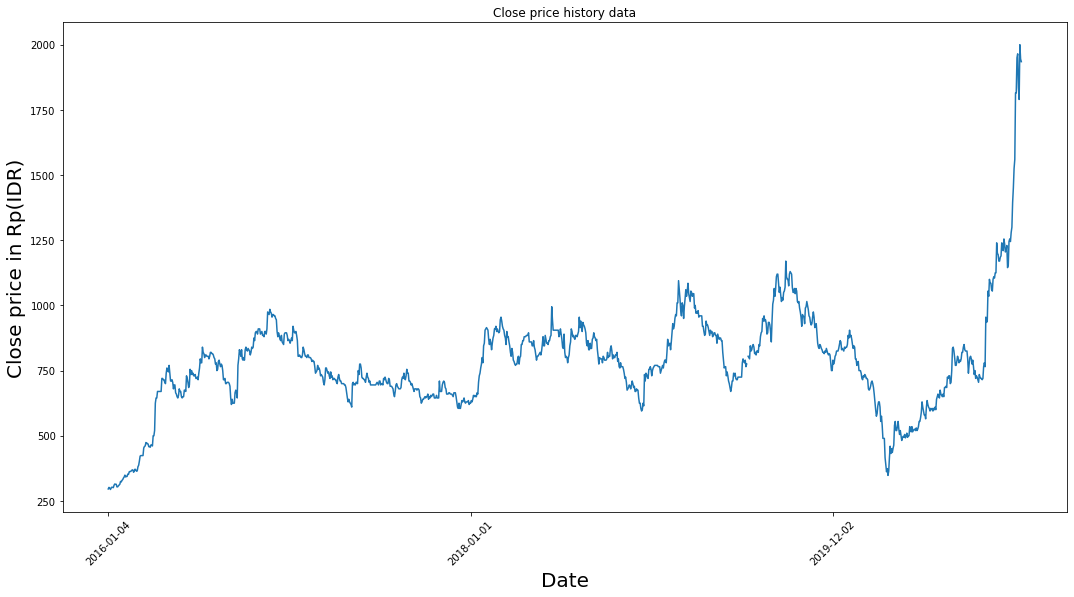

In [27]:
# plot data
mtlplt.figure(figsize=(18,9))
mtlplt.title('Close price history data')
mtlplt.plot(data_frame['Close'])
mtlplt.xticks(range(0,data_frame.shape[0],500),data_frame['Date'].loc[::500],rotation=45)
mtlplt.xlabel('Date', fontsize=20)
mtlplt.ylabel('Close price in Rp(IDR)',fontsize=20)
mtlplt.show

In [28]:
scaling_data_frame = data_frame.filter(['Open','High','Low','Close','Adj Close','Volume'])
# normalisasi
scaler = MinMaxScaler(feature_range=(0,1))
# scaling data
scaled_Data = scaler.fit_transform(scaling_data_frame)
scaled_data_frame = pd.DataFrame(data=scaled_Data, index=[data_frame.Date], columns=['Open','High','Low','Close','Adj Close','Volume'] )
rcParams['figure.figsize'] = 20, 10

In [29]:
# memfilter hanya mengambil fitur close
stock_close_data = data_frame.filter(['Close'])
stock_close_dataset = stock_close_data.values
# memilih 80% data untuk train
trainingDataLength = math.ceil( len(stock_close_dataset) * 0.8 )
trainingDataLength

1009

In [30]:
# scaling data menghindari gap data per hari
scaler = MinMaxScaler(feature_range=(0,1))

# transfom data
scaledData = scaler.fit_transform(stock_close_dataset)
scaledData

array([[0.00117233],
       [0.00468933],
       [0.003517  ],
       ...,
       [1.        ],
       [0.96776084],
       [0.96189918]])

In [31]:
# membuat dataset baru 
StockTrainData = scaledData[0:trainingDataLength , :]

# split menjadi 2
Xtrain = []
Ytrain = []

for i in range(30, len(StockTrainData)):
  Xtrain.append(StockTrainData[i-30:i, 0])
  Ytrain.append(StockTrainData[i, 0])
  if i<= 31:
    print(Xtrain)
    print(Ytrain)
    print()

[array([0.00117233, 0.00468933, 0.003517  , 0.        , 0.00293083,
       0.0052755 , 0.00468933, 0.00410317, 0.00937866, 0.0123095 ,
       0.01172333, 0.01172333, 0.00586166, 0.00586166, 0.00820633,
       0.00996483, 0.01172333, 0.01817116, 0.01699883, 0.02051583,
       0.02227433, 0.02579132, 0.02813599, 0.03223916, 0.02813599,
       0.02930832, 0.02930832, 0.03458382, 0.03399766, 0.03985932])]
[0.040445486518171175]

[array([0.00117233, 0.00468933, 0.003517  , 0.        , 0.00293083,
       0.0052755 , 0.00468933, 0.00410317, 0.00937866, 0.0123095 ,
       0.01172333, 0.01172333, 0.00586166, 0.00586166, 0.00820633,
       0.00996483, 0.01172333, 0.01817116, 0.01699883, 0.02051583,
       0.02227433, 0.02579132, 0.02813599, 0.03223916, 0.02813599,
       0.02930832, 0.02930832, 0.03458382, 0.03399766, 0.03985932]), array([0.00468933, 0.003517  , 0.        , 0.00293083, 0.0052755 ,
       0.00468933, 0.00410317, 0.00937866, 0.0123095 , 0.01172333,
       0.01172333, 0.00586166, 0

In [32]:
# convert data menjadi array
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

In [33]:
# reshape xtrain
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtrain.shape

(979, 30, 1)

In [1]:
# modeling LSTM
model = Sequential()

# var neurons
neurons = 50

# layer 1
model.add(LSTM(neurons, return_sequences=True, input_shape= (Xtrain.shape[1], 1))) 
# layer 2
model.add(LSTM(neurons, return_sequences= False)) 
# layer dense
model.add(Dense(25)) 
model.add(Dense(1))

NameError: name 'Sequential' is not defined

In [35]:
# complie dengan optimizer dan mse
model.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
import time
start_time = time.time()
# training data dengan model
history_data = model.fit(Xtrain, Ytrain, batch_size=50, epochs=200, verbose=2, validation_split=0.2)

Epoch 1/200
16/16 - 5s - loss: 0.0165 - val_loss: nan
Epoch 2/200
16/16 - 0s - loss: 0.0027 - val_loss: nan
Epoch 3/200
16/16 - 0s - loss: 0.0015 - val_loss: nan
Epoch 4/200
16/16 - 0s - loss: 0.0012 - val_loss: nan
Epoch 5/200
16/16 - 0s - loss: 9.5344e-04 - val_loss: nan
Epoch 6/200
16/16 - 0s - loss: 8.1992e-04 - val_loss: nan
Epoch 7/200
16/16 - 0s - loss: 7.5426e-04 - val_loss: nan
Epoch 8/200
16/16 - 0s - loss: 6.9466e-04 - val_loss: nan
Epoch 9/200
16/16 - 0s - loss: 6.9725e-04 - val_loss: nan
Epoch 10/200
16/16 - 0s - loss: 6.5369e-04 - val_loss: nan
Epoch 11/200
16/16 - 0s - loss: 6.2330e-04 - val_loss: nan
Epoch 12/200
16/16 - 0s - loss: 6.1092e-04 - val_loss: nan
Epoch 13/200
16/16 - 0s - loss: 5.9309e-04 - val_loss: nan
Epoch 14/200
16/16 - 0s - loss: 5.6624e-04 - val_loss: nan
Epoch 15/200
16/16 - 0s - loss: 5.3911e-04 - val_loss: nan
Epoch 16/200
16/16 - 0s - loss: 5.6609e-04 - val_loss: nan
Epoch 17/200
16/16 - 0s - loss: 5.4258e-04 - val_loss: nan
Epoch 18/200
16/16 - 0

In [37]:
# menghitung waktu training
print((time.time()-start_time))

66.53366279602051


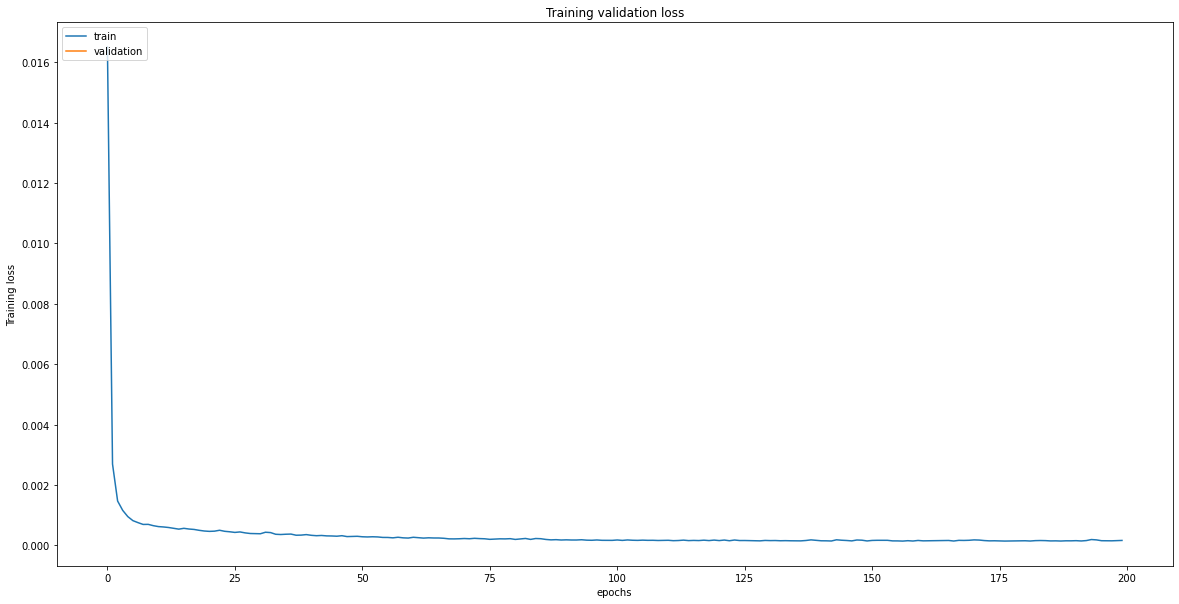

In [38]:
# plot validasi loss dan train loss
mtlplt.figure(figsize=(20,10))
mtlplt.title('Training validation loss')
mtlplt.plot(history_data.history['loss'])
mtlplt.plot(history_data.history['val_loss'])
mtlplt.ylabel('Training loss')
mtlplt.xlabel('epochs')
mtlplt.legend(['train' , 'validation'], loc = 'upper left')
mtlplt.show()

In [39]:
# membuat var testing 
testingData = scaledData[trainingDataLength - 30: , :]

## Create dataset Xtest and Ytest
Xtest = []
Ytest = stock_close_dataset[trainingDataLength:, :]
for i in range(30, len(testingData)):
  Xtest.append(testingData[i-30:i, 0])

In [40]:
Xtest = np.array(Xtest)


In [41]:
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1 ))

In [42]:
#prediksi
predictions = model.predict(Xtest)
predictions = scaler.inverse_transform(predictions)

In [43]:
rmse=np.sqrt(np.mean(((predictions- Ytest)**2)))
rmse

43.83157739523798

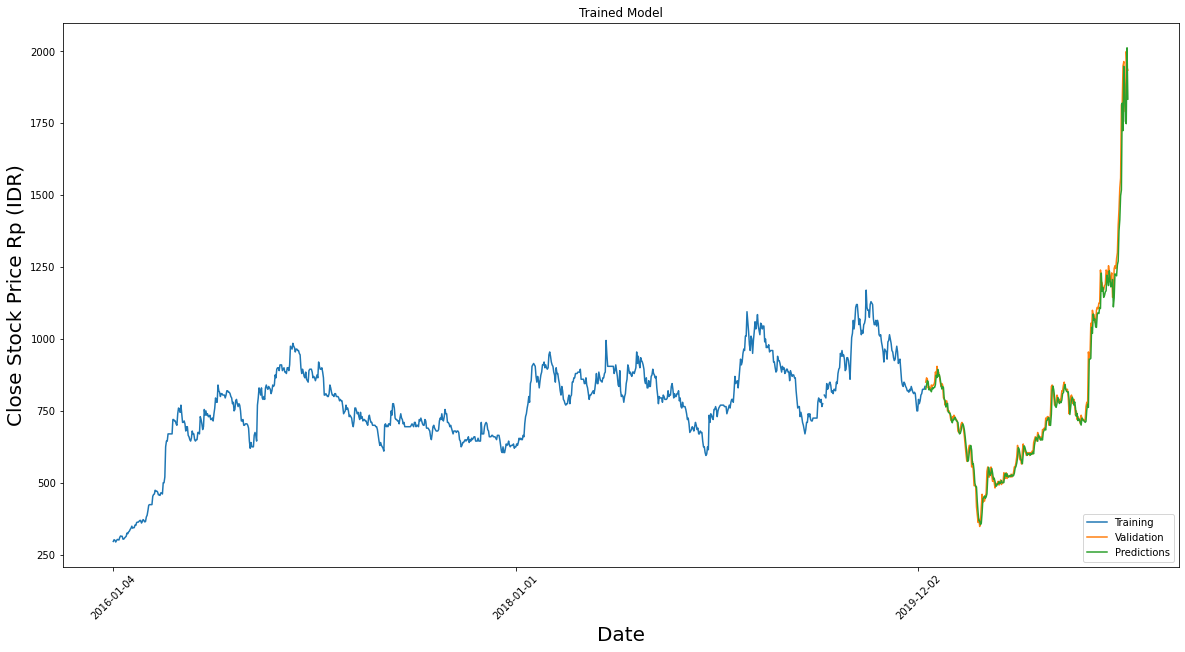

In [44]:
training = stock_close_data[:trainingDataLength]
validation = stock_close_data[trainingDataLength:]
validation['Predictions'] = predictions

mtlplt.figure(figsize=(20,10))
mtlplt.title('Trained Model')
mtlplt.xticks(range(0,data_frame.shape[0],500),data_frame['Date'].loc[::500],rotation=45)
mtlplt.xlabel('Date', fontsize=20)
mtlplt.ylabel('Close Stock Price Rp (IDR)', fontsize=20)
mtlplt.plot(training['Close'])
mtlplt.plot(validation[['Close', 'Predictions']])
mtlplt.legend(['Training', 'Validation', 'Predictions'], loc='lower right')
mtlplt.show()

In [45]:
validation

,Close,Predictions
1009,850.0,825.690674
1010,865.0,840.013123
1011,860.0,854.977905
1012,830.0,851.356079
1013,835.0,823.273743
...,...,...
1256,1835.0,1877.418823
1257,1790.0,1757.279785
1258,2000.0,1748.880981
1259,1945.0,2012.700684


In [46]:
validation.to_excel('ANTM_200.xlsx')